# Relax Challenge
--------------------------

The analysis of the data provided the following findings: 

- Adopted Users and Non-Adopted Users had the most number of 'ORG_INVITE' as creation source. 
- More Adopted Users preferred not to opt into mailing list or be in the marketing drip. 
- GMAIL was the preferred email client for both adopted and non-adopted users. 
- It looks like majority of the non-adopted users registered from Jan-May
- The most interesting finding is that the least amount of registration occurred on May for adopted users, but it's the most registered in non-adopted users.
- The most adopted users registered occured in the 10th Month: October. 
- Daily Distribution : On the 11th day of the month, there seems to be the most adopted users. 
- Yearly Distribution; Most Adopted and Non-Adopted Users gained in 2013. 

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)
%matplotlib inline

In [34]:
df = pd.read_csv('takehome_user_engagement.csv')
df.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [35]:
df['time_stamp'] = pd.to_datetime(df.time_stamp)

In [36]:
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [37]:
df['wk'] = df['time_stamp'].dt.week

In [38]:
df_new = df.groupby(['wk','user_id'])['time_stamp'].count().reset_index(name="freq")
result = df_new[df_new.freq >= 3]

result.head()

,wk,user_id,freq
1,1,10,5
2,1,42,4
5,1,63,7
6,1,69,10
7,1,81,3


In [39]:
# Now we can create our labels with these unique users that logged in 3 times or more within 7 days
unique_users = result.user_id.unique()
unique_users

array([   10,    42,    63, ...,  4134, 10446, 10335])

In [128]:


# Load json file into pandas dataframe
df_user = pd.read_csv('takehome_users.csv', encoding ='latin1')
df_user.head()



,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [129]:
df_user['adopted_user'] = df_user.object_id.isin(unique_users)

In [130]:
df_user.adopted_user.value_counts(1)

False    0.879583
True     0.120417
Name: adopted_user, dtype: float64

In [131]:
df_user.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted_user                     bool
dtype: object

In [132]:
df_user.adopted_user = df_user.adopted_user.astype(int)

In [133]:
df_user.shape

(12000, 11)

## Creation Source

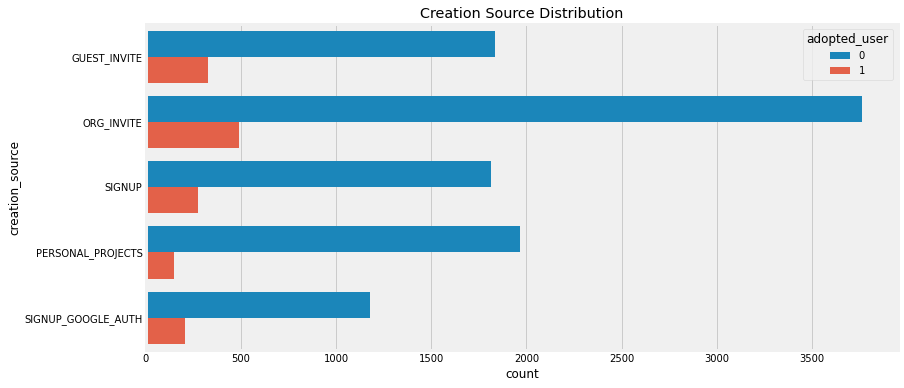

In [134]:
plt.figure(figsize=(12,6))
sns.countplot(y='creation_source', hue='adopted_user', data=df_user)
plt.title('Creation Source Distribution')
plt.show()

## Marketing Drip

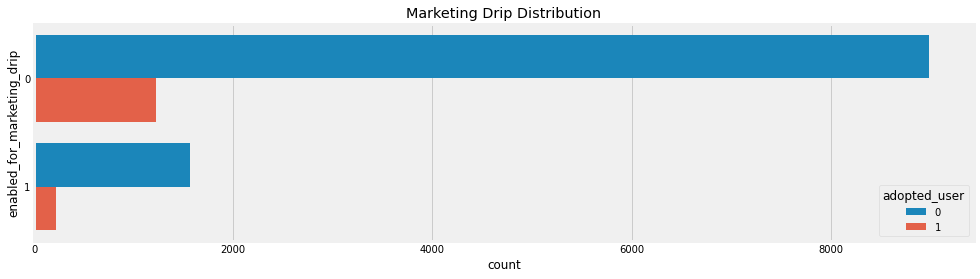

In [135]:
plt.figure(figsize=(15,4))
sns.countplot(y='enabled_for_marketing_drip', hue='adopted_user', data=df_user)
plt.title('Marketing Drip Distribution')
plt.show()

## Opted in to Mailing List

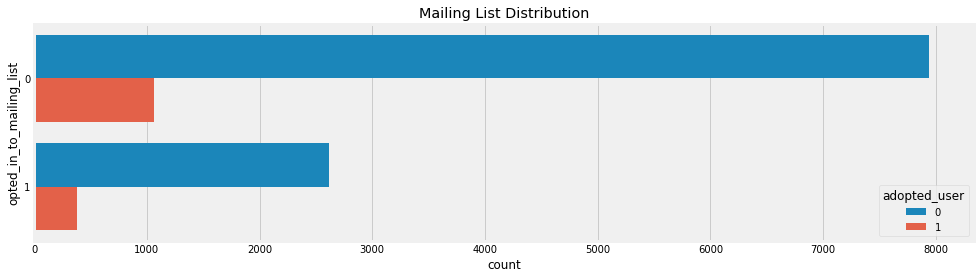

In [136]:
plt.figure(figsize=(15,4))
sns.countplot(y='opted_in_to_mailing_list', hue='adopted_user', data=df_user)
plt.title('Mailing List Distribution')
plt.show()

## Feature Engineering

In [137]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [138]:
df_user['creation_time'] = pd.to_datetime(df_user.creation_time)

In [139]:
df_user['year'] = df_user['creation_time'].dt.year
df_user['month'] = df_user['creation_time'].dt.month
df_user['day'] = df_user['creation_time'].dt.day

In [140]:
df_user

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,year,month,day
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,2014,4,22
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,2013,11,15
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,2013,3,19
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,2013,5,21
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,2013,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0,2013,9,6
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0,2013,1,10
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0,2014,4,27
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,0,2012,5,31


In [141]:
# Extract email client from emails 
start = '@'
end = '.'
se = df_user.email

email_clients = ([s[s.find(start)+len(start):s.rfind(end)] for s in se])

df_user['email_client'] = email_clients

In [176]:
df_user['email_client'].value_counts()[0:7]

gmail         3562
yahoo         2447
jourrapide    1259
cuvox         1202
gustr         1179
hotmail       1165
luque            2
Name: email_client, dtype: int64

In [177]:
email_list = ['gmail', 'yahoo', 'jourrapide', 'cuvox', 'gustr', 'hotmail']
new_df = df_user[df_user['email_client'].isin(email_list)]

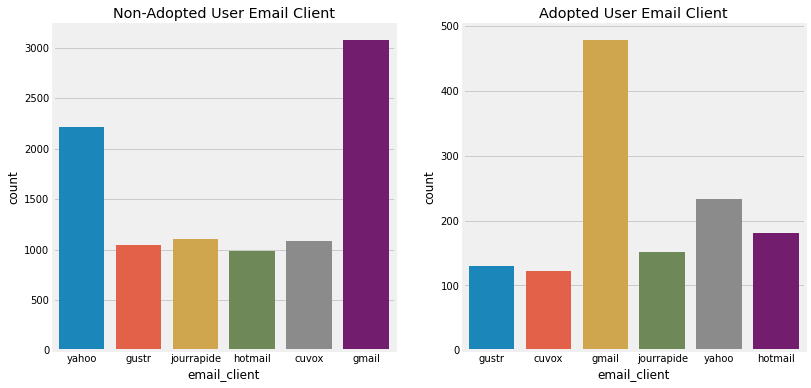

In [196]:
fig, axe = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='email_client', data=new_df[new_df['adopted_user'] == 0], ax=axe[0]).set_title('Non-Adopted User Email Client')
sns.countplot(x='email_client', data=new_df[new_df['adopted_user'] == 1], ax=axe[1]).set_title('Adopted User Email Client')
plt.show()

## Non- Adopted Users by Month

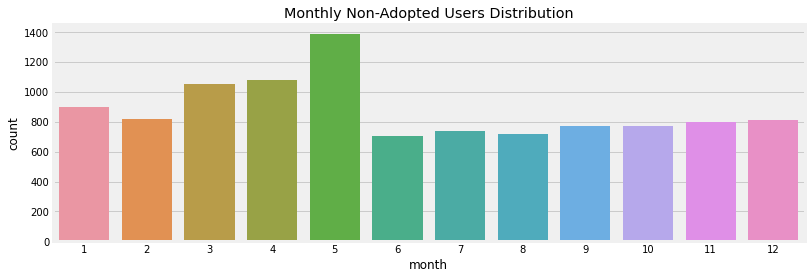

In [80]:
plt.figure(figsize=(12,4))
sns.countplot(x='month',data = df_user[df_user['adopted_user']==0])
plt.title('Monthly Non-Adopted Users Distribution')
plt.show()

## Adopted Users by Month

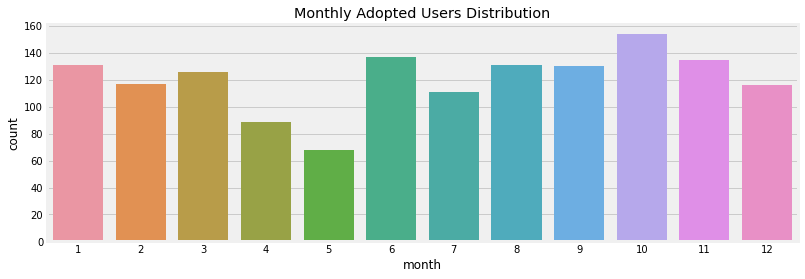

In [84]:
plt.figure(figsize=(12,4))
sns.countplot(x='month',data = df_user[df_user['adopted_user']==1])
plt.title('Monthly Adopted Users Distribution')

plt.show()

## Non- Adopted Users by Day

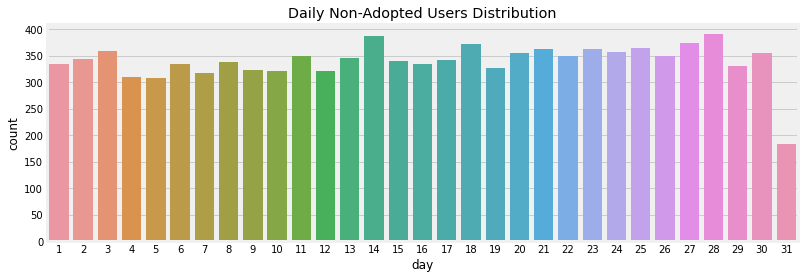

In [83]:
plt.figure(figsize=(12,4))
sns.countplot(x='day',data = df_user[df_user['adopted_user']==0])
plt.title('Daily Non-Adopted Users Distribution')
plt.show()

## Adopted Users by Day

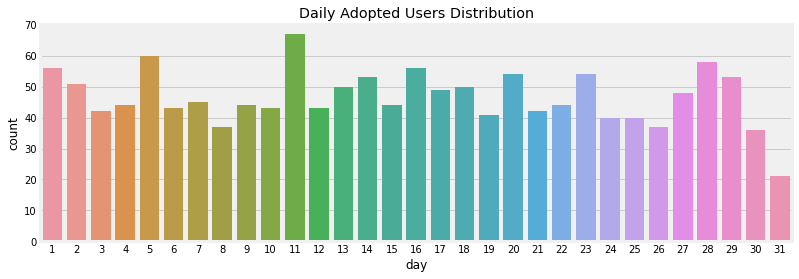

In [82]:
plt.figure(figsize=(12,4))
sns.countplot(x='day',data = df_user[df_user['adopted_user']==1])
plt.title('Daily Adopted Users Distribution')
plt.show()

## Adopted and Non-Adopted Users by Year

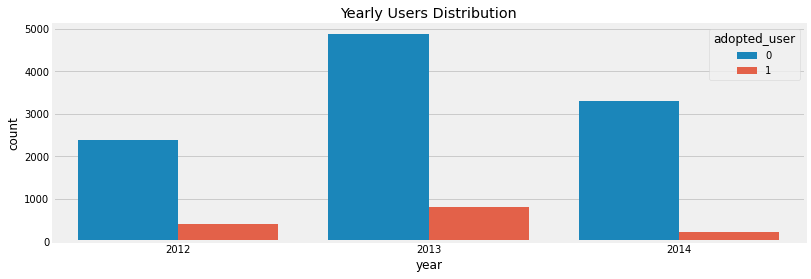

In [185]:
plt.figure(figsize=(12,4))
sns.countplot(x='year',hue='adopted_user', data=df_user)
plt.title('Yearly Users Distribution')
plt.show()